In [1]:
import pandas
import numpy
import faker

In [2]:
data_file_name = 'data\\Group12_Datasetpatients_data.csv'

In [3]:
df = pandas.read_csv(data_file_name,error_bad_lines=False,low_memory=False)

In [4]:
df.columns.values.tolist()

['Patient Number',
 'State Patient Number',
 'Date Announced',
 'Estimated Onset Date',
 'Age Bracket',
 'Gender',
 'Detected City',
 'Detected District',
 'Detected State',
 'State code',
 'Current Status',
 'Notes',
 'Contracted from which Patient (Suspected)',
 'Nationality',
 'Type of transmission',
 'Status Change Date',
 'Source_1',
 'Source_2',
 'Source_3',
 'Backup Notes',
 'Num Cases',
 'Entry_ID']

In [5]:
#dropping following columns:
# State Patient Number
# Estimated Onset Date
# Detected City
# Contracted from which Patient (Suspected)
# Nationality
# State Change Date
# Source_3
# Num_Cases
# Entry_ID
df.drop(columns=["State Patient Number","Estimated Onset Date","Detected City","Contracted from which Patient (Suspected)","Nationality","Status Change Date","Source_3","Num Cases","Entry_ID","State code"],inplace=True)

In [6]:
df.columns.values.tolist()

['Patient Number',
 'Date Announced',
 'Age Bracket',
 'Gender',
 'Detected District',
 'Detected State',
 'Current Status',
 'Notes',
 'Type of transmission',
 'Source_1',
 'Source_2',
 'Backup Notes']

In [7]:
maxid = df["Patient Number"].max()
print(maxid)

102610.0


In [8]:
# update the Patient Number for NaN as maxid + existing dataframe index
df.loc[df["Patient Number"].isnull(),"Patient Number"] = df[df["Patient Number"].isnull()].index + maxid

In [9]:
# check that Patient Number is populated for all records
df[df["Patient Number"].isna()]
print("New maxid: ", df["Patient Number"].max())

New maxid:  179470.0


In [10]:
#Notes column cleanup - Step 1: replace NaN values with Blank
df.fillna({"Notes":""},inplace=True)

In [11]:
#Notes column cleanup - Step 2: gather all index location for Notes that contain "Correction" value
notes_index_names = df[df["Notes"].str.contains("Correction")].index

In [12]:
#Notes column clenaup - Step 3: delete rows containing above indexes
df.drop(notes_index_names, inplace = True)

In [13]:
#Detected State cleanup: Step 1: gather all index location for Detected State that contains NaN
state_index_names = df[df["Detected State"].isna()].index

In [14]:
#Detected State column clenaup - Step 2: delete rows containing above indexes
df.drop(state_index_names, inplace = True)

In [15]:
#Current Status column cleanup - removing 2 blank rows and Migrated Others rows
df["Current Status"].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan], dtype=object)

In [16]:
current_status_index_blank = df[df["Current Status"].isna()].index

In [17]:
df.drop(current_status_index_blank,inplace = True)

In [18]:
current_status_index_migrated_other = df[df["Current Status"].str.contains("Migrated_Other")].index

In [19]:
df.drop(current_status_index_migrated_other,inplace = True)

In [20]:
#Type of transmissions - cleanup
df["Type of transmission"].unique()

array(['Imported', 'Local', 'TBD', nan, 'Imported ', 'Unknown'],
      dtype=object)

In [21]:
#only updating 'Imported ' to 'Imported'
df.loc[df["Type of transmission"] == "Imported ","Type of transmission"] = "Imported"

In [22]:
#Gender column cleanup 
# update 'M ' to 'M', 'Non-Binary' to "Other"
df["Gender"].unique()

array(['F', nan, 'M', 'Non-Binary', 'M '], dtype=object)

In [23]:
df.loc[df["Gender"] == "M ","Gender"] = "M"

In [24]:
df.loc[df["Gender"] == "Non-Binary","Gender"] = "Other"

In [25]:
#using standard distribution to randomly generate M and F for 67% and 33% for 59390 times
from faker import Faker
from collections import OrderedDict
fake = Faker()
gender_elements = OrderedDict([('M',0.67),('F',0.33)])
gender_list = []
for _ in range(59390):
    gender_list.append(fake.random_element(gender_elements))
gender_list

['M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M'

In [26]:
df.loc[df["Gender"].isna(),"Gender"] = gender_list

In [27]:
df["Gender"].unique()

array(['F', 'M', 'Other'], dtype=object)

<AxesSubplot:>

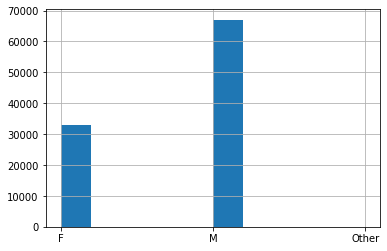

In [28]:
df["Gender"].hist()

In [29]:
df.groupby("Gender").count()

,Patient Number,Date Announced,Age Bracket,Detected District,Detected State,Current Status,Notes,Type of transmission,Source_1,Source_2,Backup Notes
Gender,,,,,,,,,,,
F,32895,32895,12394,30318,32895,32895,32895,851,32395,1698,130
M,67033,67033,25437,61890,67033,67033,67033,2139,66018,3393,231
Other,7,7,7,7,7,7,7,0,7,0,0


In [30]:
df["Age Bracket"].unique()

array(['20', nan, '45', '24', '69', '55', '70', '16', '27', '59', '65',
       '75', '54', '53', '61', '25', '63', '46', '3', '48', '40', '47',
       '13', '96', '89', '85', '68', '26', '33', '76', '37', '43', '21',
       '42', '44', '51', '31', '32', '29', '67', '49', '52', '22', '18',
       '34', '28', '56', '35', '50', '30', '38', '23', '19', '58', '41',
       '2', '60', '74', '39', '17', '36', '57', '64', '81', '62', '73',
       '9', '7', '66', '12', '1', '14', '11', '6', '28-35', '92', '72',
       '15', '77', '10', '80', '71', '78', '79', '90', '4', '8', '5',
       '1.5', '48.0', '55.0', '57.0', '58.0', '66.0', '32.0', '2.0',
       '17.0', '13.0', '30.0', '50.0', '19.0', '40.0', '28.0', '64.0',
       '24.0', '7.0', '36.0', '27.0', '25.0', '21.0', '47.0', '10.0',
       '34.0', '38.0', '14.0', '22.0', '23.0', '26.0', '45.0', '16.0',
       '18.0', '60.0', '12.0', '67.0', '29.0', '61.0', '80.0', '39.0',
       '31.0', '20.0', '37.0', '54.0', '42.0', '43.0', '35.0', '46.0',


In [31]:
#Cleanup - nan = -1, '28-35' = 31.5, '6 Months = 0.6'
# change data type to float
df.loc[df["Age Bracket"].isna(),"Age Bracket"] = -1
df.loc[df["Age Bracket"] == '28-35',"Age Bracket"] = 31.5
df.loc[df["Age Bracket"] == '6 Months',"Age Bracket"] = 0.6
df["Age Bracket"] = df["Age Bracket"].astype(float)   #changed datatype to float

In [32]:
#Cleanup for Age Bracket
#<1, 1-4, 5-14, 15-24, 25-34, 35-44, 45-54, 55-64, 65-74 and 75+ years;
df.loc[(df["Age Bracket"] >= 0.) & (df["Age Bracket"] < 1.),  'AgeGroup'] = '< 1'
df.loc[(df["Age Bracket"] >= 1.) & (df["Age Bracket"] < 5.),  'AgeGroup'] = '1-4'
df.loc[(df["Age Bracket"] >= 5.) & (df["Age Bracket"] < 15.),  'AgeGroup'] = '5-14'
df.loc[(df["Age Bracket"] >= 15.) & (df["Age Bracket"] < 25.),  'AgeGroup'] = '15-24'
df.loc[(df["Age Bracket"] >= 25.) & (df["Age Bracket"] < 35.),  'AgeGroup'] = '25-34'
df.loc[(df["Age Bracket"] >= 34.) & (df["Age Bracket"] < 45.),  'AgeGroup'] = '35-44'
df.loc[(df["Age Bracket"] >= 45.) & (df["Age Bracket"] < 55.),  'AgeGroup'] = '45-54'
df.loc[(df["Age Bracket"] >= 55.) & (df["Age Bracket"] < 65.),  'AgeGroup'] = '55-64'
df.loc[(df["Age Bracket"] >= 65.) & (df["Age Bracket"] < 75.),  'AgeGroup'] = '65-74'
df.loc[(df["Age Bracket"] >= 75.                           ),  'AgeGroup'] = '75+'

In [33]:
df[df["AgeGroup"].isna()]

,Patient Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Notes,Type of transmission,Source_1,Source_2,Backup Notes,AgeGroup
1,2.0,02/02/2020,-1.0,M,Alappuzha,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN
2,3.0,03/02/2020,-1.0,M,Kasaragod,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,Student from Wuhan,NaN
21,22.0,04/03/2020,-1.0,M,Agra,Uttar Pradesh,Hospitalized,Family members of P4,Local,https://www.businesstoday.in/latest/trends/cor...,NaN,Family members of P4,NaN
22,23.0,04/03/2020,-1.0,F,Agra,Uttar Pradesh,Recovered,Family members of P4,Local,https://www.businesstoday.in/latest/trends/cor...,NaN,Family members of P4,NaN
24,25.0,04/03/2020,-1.0,M,Agra,Uttar Pradesh,Recovered,Family members of P4,Local,https://www.businesstoday.in/latest/trends/cor...,NaN,Family members of P4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100279,102515.0,19/06/2020,-1.0,F,Pulwama,Jammu and Kashmir,Hospitalized,,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN
100280,102516.0,19/06/2020,-1.0,F,Reasi,Jammu and Kashmir,Recovered,,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN
100281,102517.0,19/06/2020,-1.0,M,Kishtwar,Jammu and Kashmir,Recovered,,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN
100282,102609.0,19/06/2020,-1.0,F,East Sikkim,Sikkim,Recovered,Entry was done on 13 Jun but re-concilled now,NaN,https://www.eastmojo.com/coronavirus-updates/2...,NaN,NaN,NaN


In [34]:
df.groupby("AgeGroup").count()["Patient Number"]

AgeGroup
1-4       814
15-24    6850
25-34    8724
35-44    8203
45-54    5373
5-14     2407
55-64    3323
65-74    1514
75+       592
< 1        38
Name: Patient Number, dtype: int64

In [35]:
"""
00-01     38     0.10%
01-04    814     2.15%
05-14   2407     6.36%
15-24   6850    18.10%
25-34   8724    23.06%
35-44   8203    21.68%
45-54   5373    14.20%
55-64   3323     8.78%
65-74   1514     4.00%
75+      592     1.56%
Total  37838   100.00%
"""
# using above disutribuion to populate the NaN age group for -1 records - 62097 

'\n00-01     38     0.10%\n01-04    814     2.15%\n05-14   2407     6.36%\n15-24   6850    18.10%\n25-34   8724    23.06%\n35-44   8203    21.68%\n45-54   5373    14.20%\n55-64   3323     8.78%\n65-74   1514     4.00%\n75+      592     1.56%\nTotal  37838   100.00%\n'

In [36]:
agegroup_elements = OrderedDict([('< 1',0.0010),
                                 ('1-4',0.0215),
                                 ('5-14',0.0636),
                                 ('15-24',0.1810),
                                 ('25-34',0.2306),
                                 ('35-44',0.2168),
                                 ('45-54',0.1420),
                                 ('55-64',0.0878),
                                 ('65-74',0.0400),
                                 ('75+',0.0156)]
                               )
agegroup_list = []
for _ in range(62097 ):
    agegroup_list.append(fake.random_element(agegroup_elements))
agegroup_list

['15-24',
 '15-24',
 '25-34',
 '35-44',
 '35-44',
 '65-74',
 '15-24',
 '45-54',
 '25-34',
 '15-24',
 '45-54',
 '35-44',
 '45-54',
 '45-54',
 '35-44',
 '15-24',
 '25-34',
 '65-74',
 '25-34',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '45-54',
 '35-44',
 '15-24',
 '15-24',
 '15-24',
 '25-34',
 '35-44',
 '15-24',
 '5-14',
 '35-44',
 '55-64',
 '55-64',
 '25-34',
 '15-24',
 '35-44',
 '15-24',
 '5-14',
 '35-44',
 '45-54',
 '45-54',
 '35-44',
 '35-44',
 '45-54',
 '25-34',
 '15-24',
 '15-24',
 '35-44',
 '35-44',
 '25-34',
 '25-34',
 '25-34',
 '25-34',
 '45-54',
 '65-74',
 '35-44',
 '35-44',
 '15-24',
 '35-44',
 '15-24',
 '45-54',
 '35-44',
 '15-24',
 '25-34',
 '5-14',
 '35-44',
 '25-34',
 '45-54',
 '35-44',
 '5-14',
 '15-24',
 '35-44',
 '15-24',
 '35-44',
 '55-64',
 '65-74',
 '55-64',
 '25-34',
 '35-44',
 '25-34',
 '35-44',
 '45-54',
 '25-34',
 '45-54',
 '25-34',
 '45-54',
 '35-44',
 '55-64',
 '25-34',
 '25-34',
 '25-34',
 '1-4',
 '25-34',
 '35-44',
 '25-34',
 '35-44',
 '35-44',
 '15-24',
 '35-4

In [37]:
df.loc[df["AgeGroup"].isna(),"AgeGroup"] = agegroup_list

<AxesSubplot:>

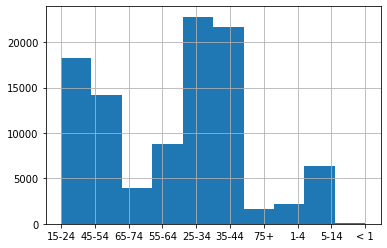

In [38]:
df["AgeGroup"].hist()

In [39]:
df["AgeGroup"].unique()

array(['15-24', '45-54', '65-74', '55-64', '25-34', '35-44', '75+', '1-4',
       '5-14', '< 1'], dtype=object)

In [40]:
df.to_csv("data\\clean_data.csv")

# Part 2 of the data cleaning and pre-processing

In [41]:
file_name = "data\\group12data_km.csv"

In [42]:
df = pandas.read_csv(file_name,low_memory=False)

In [43]:
df.drop("index",axis='columns',inplace=True)

In [44]:
df.set_index("Patient Number",inplace=True)

In [45]:
df.head()

,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Notes,Type of transmission,Source_1,Source_2,Backup Notes,AgeGroup
Patient Number,,,,,,,,,,,,
1.0,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,Travelled from Wuhan,Imported,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,15-24
2.0,2/2/2020,-1.0,M,Alappuzha,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,5-14
3.0,3/2/2020,-1.0,M,Kasaragod,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,Student from Wuhan,35-44
4.0,2/3/2020,45.0,M,East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",Imported,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,Travel history to Italy and Austria,45-54
5.0,2/3/2020,24.0,M,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",Imported,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,"Travel history to Dubai, Singapore contact",15-24


In [46]:
import re

In [47]:
# Combine all the source columns, extract domain and handle
df['Shortened_Source'] = df['Source_1']
df['Shortened_Source'] = df['Shortened_Source'].fillna(df['Source_2'])
df['Shortened_Source'] = df['Shortened_Source'].fillna('unknown')
 
def source_shortener(source):
    shortened_source = []
    for url in source:
        domain = re.findall(r'^(?:.*:\/\/)?(?:www\.)?([^:\/]*).*$', url, re.M|re.I)[0]
        if len(domain) <= 0:
            domain = 'unknown'
        if re.search(r'(twitter|facebook)', domain):
            handle = re.findall(r'(?<=\.com\/)(.*?)(?=\/)', url)
            domain = re.sub('.com', '', domain)
            if len(handle) > 0:
                domain += ' @' + handle[0]
            else:
                domain += ' unknown'
        shortened_source.append(domain)
    return shortened_source
 
df['Shortened_Source'] = source_shortener(df['Shortened_Source'])
df.head()

,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Notes,Type of transmission,Source_1,Source_2,Backup Notes,AgeGroup,Shortened_Source
Patient Number,,,,,,,,,,,,,
1.0,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,Travelled from Wuhan,Imported,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,15-24,twitter @vijayanpinarayi
2.0,2/2/2020,-1.0,M,Alappuzha,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,5-14,indiatoday.in
3.0,3/2/2020,-1.0,M,Kasaragod,Kerala,Recovered,Travelled from Wuhan,Imported,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,Student from Wuhan,35-44,indiatoday.in
4.0,2/3/2020,45.0,M,East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",Imported,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,Travel history to Italy and Austria,45-54,indiatoday.in
5.0,2/3/2020,24.0,M,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",Imported,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,"Travel history to Dubai, Singapore contact",15-24,deccanherald.com


In [48]:
df.drop(["Source_1","Source_2"],axis='columns',inplace=True)

In [49]:
df.head()

,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Notes,Type of transmission,Backup Notes,AgeGroup,Shortened_Source
Patient Number,,,,,,,,,,,
1.0,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,Travelled from Wuhan,Imported,Student from Wuhan,15-24,twitter @vijayanpinarayi
2.0,2/2/2020,-1.0,M,Alappuzha,Kerala,Recovered,Travelled from Wuhan,Imported,Student from Wuhan,5-14,indiatoday.in
3.0,3/2/2020,-1.0,M,Kasaragod,Kerala,Recovered,Travelled from Wuhan,Imported,Student from Wuhan,35-44,indiatoday.in
4.0,2/3/2020,45.0,M,East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",Imported,Travel history to Italy and Austria,45-54,indiatoday.in
5.0,2/3/2020,24.0,M,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",Imported,"Travel history to Dubai, Singapore contact",15-24,deccanherald.com


In [50]:
df.to_csv("data\\group12data_kmv2.csv")

In [51]:
df.drop(["Backup Notes"],axis='columns',inplace=True)

In [52]:
#Notes and Backup Notes pre - processing
# Student from Wuhan - Country (mostly type of transmission is imported)
# Travel or Travelled or Travelled

In [53]:
df.loc[df["Notes"].isna(),"Notes"] = ""

In [54]:
df.loc[df["Notes"].str.contains("Travel"),"Travel Flag"] = 1

In [55]:
df.loc[df["Notes"].str.contains("Travel"),"Notes"] = "done"

In [56]:
df["Notes"].unique()

array(['done', 'Family members of P4',
       'Accompanied the Italian tourists, Nationality: Indian', ...,
       'Reconcilled with 20th June Bulletin',
       'Reconcilling to match district numbers',
       'Entry was done on 13 Jun but re-concilled now '], dtype=object)

In [57]:
df.loc[df["Notes"].str.contains("family"),"Contact Flag"] = 1
df.loc[df["Notes"].str.contains("family"),"Notes"] = "done"

In [58]:
df.loc[df["Notes"].str.contains("Wife"),"Contact Flag"] = 1
df.loc[df["Notes"].str.contains("Concilled"),"Notes"] = "done"

In [59]:
dfsubset = df[df["Notes"] == "done"]

In [60]:
dfsubset

,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Notes,Type of transmission,AgeGroup,Shortened_Source,Travel Flag,Contact Flag
Patient Number,,,,,,,,,,,,
1.0,30/01/2020,20.0,F,Thrissur,Kerala,Recovered,done,Imported,15-24,twitter @vijayanpinarayi,1.0,NaN
2.0,2/2/2020,-1.0,M,Alappuzha,Kerala,Recovered,done,Imported,5-14,indiatoday.in,1.0,NaN
3.0,3/2/2020,-1.0,M,Kasaragod,Kerala,Recovered,done,Imported,35-44,indiatoday.in,1.0,NaN
4.0,2/3/2020,45.0,M,East Delhi,Delhi,Recovered,done,Imported,45-54,indiatoday.in,1.0,NaN
5.0,2/3/2020,24.0,M,Hyderabad,Telangana,Recovered,done,Imported,15-24,deccanherald.com,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
101214.0,19/06/2020,-1.0,M,Almora,Uttarakhand,Hospitalized,done,NaN,15-24,twitter @ANI,1.0,NaN
101329.0,19/06/2020,30.0,F,Chandigarh,Chandigarh,Hospitalized,done,NaN,25-34,t.me,NaN,1.0
101330.0,19/06/2020,32.0,M,Chandigarh,Chandigarh,Hospitalized,done,NaN,25-34,t.me,NaN,1.0


In [61]:
dfsubset.to_csv("data\\subset_data.csv")

In [62]:
df.drop("Notes",axis="columns",inplace=True)

In [63]:
df.to_csv("data\\group12datav3.csv")

In [67]:
# Combine all the source columns to one and groupby domain type(social media, news, government and unknown)
df1 = pandas.read_csv(data_file_name,error_bad_lines=False,low_memory=False)
df1['Shortened_Source'] = df1['Source_1']
df1['Shortened_Source'] = df1['Shortened_Source'].fillna(df1['Source_2'])
df1['Shortened_Source'] = df1['Shortened_Source'].fillna(df1['Source_3'])
df1['Shortened_Source'] = df1['Shortened_Source'].fillna('unknown')

def source_shortener(source):
    shortened_source = []
    for url in source:
        domain = re.findall(r'^(?:.*:\/\/)?(?:www\.)?([^:\/]*).*$', url, re.M|re.I)[0]
        if len(domain) <= 0:
            src = 0
        elif re.search(r'(twitter|facebook)', domain):
            src = 1
        elif re.search(r'state|board|health|gov', domain):
            src = 2
        else:
            src = 3
        shortened_source.append(src)
    return shortened_source

df1['Shortened_Source'] = source_shortener(df1['Shortened_Source'])
df1.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID,Shortened_Source
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,3
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,3
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN,3
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN,3
